In [0]:
# lib.zipをアップロードしたうえで、最初にこのコマンドを実行する
!unzip -q 'lib.zip'

replace lib/common/__init__.py? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

# **ゼロから作るディープラーニング3章「手書き文字認識」6月1日**
Notebookに題材本の内容をまとめました。  
スライドなしでGoogle Colabベースで発表したいと思います。

## **前回のおさらい**
主に以下の2点について学んだ。
* 活性化関数
* ニューラルネットワークの計算

[【ゼロから作るディープラーニング#4】多次元配列とニューラルネットワークの実装【p53-71】](https://bdarc.net/deep-learning-from-scratch-53-71/#%E3%83%90%E3%82%A4%E3%82%A2%E3%82%B9%E3%82%92%E5%8A%A0%E3%81%88%E3%81%A6%E3%81%AE%E7%A2%BA%E8%AA%8D)

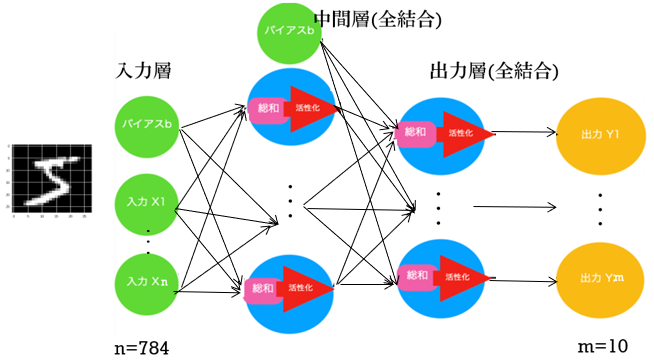


## **今日の範囲**
## **3.6手書き数字認識**

　NNの仕組みを学んだところで、実践的な問題に取り組みましょう。ここでは、手書き数字認識の分類を行いたいと思います。学習は既に完了したものとして、学習済みのパラメータを使って、NNの「推論処理」だけを実装していきます。なお、推論処理は、NNの順方向伝播(forward propagation)とも言います。

### **3.6.1MNISTデータセット**
　ここで使用するデータセットはMNISTという手書き数字の画像セットです。MNISTは機械学習の分野で最も有名なデータセットであり、簡単な実装から論文として発表される研究まで、様々な場所で利用されています。実際、画像認識や機械学習の論文を読んでいると実験用のデータとしてよく登場するのが、このMNISTデータだったりします。

#### **MNISTの基本情報**
* 0~9までの数字画像から構成されている
* 訓練画像60,000枚, テスト画像10,000枚
* 28x28のグレー画像(1チャンネル)
* 各ピクセルは0から255までの値を取る
* 各画像には「7」「2」[1]といった正解ラベルが与えられている
* 以下のWebページの画像が分かりやすいです.  
[MNIST：手書き数字の画像データセット：AI・機械学習のデータセット辞典 (l_di-02.gif) - ＠IT](https://image.itmedia.co.jp/l/im/ait/articles/2001/22/l_di-02.gif#_ga=2.106667975.555363803.1590920513-732235425.1570584916)

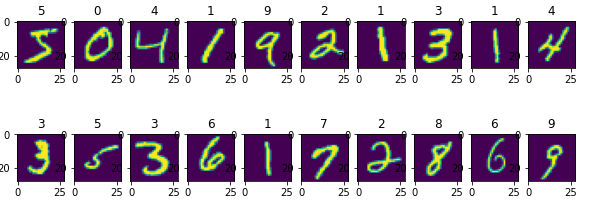

In [1]:
# import sys, os
# sys.path.append(os.pardir) # 親ディレクトリのファイルをimportするための設定

from lib.dataset.mnist import load_mnist # フォルダ名.ファイル名

# 最初の呼び出しは数分待ちます・・・
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False, one_hot_label=True)

# 各々のデータの形状を出力
print(x_train.shape) # 訓練用画像
print(t_train.shape) # 訓練用画像の正解ラベル
print(x_test.shape) # テスト用画像
print(t_test.shape) # テスト用画像の正解ラベル

ModuleNotFoundError: ignored

　ここでは、親ディレクトリのファイルをimportするための設定を行います。dataset/mnist.pyの`load_mnist`関数のimportを行います。最後に、そのimportした`load_mnist`関数によって、MNISTデータセットの読み込みを行います。`load_mnist`関数によって、MNISTデータセットのダウンロードを行うため、ネット接続が必要です。2回目以降の呼び出しは、ローカル保存したファイル(pickleファイル)の読み込みだけを行うため、直ぐに処理が終了します。



　`load_mnist`関数は、「(訓練画像, 訓練ラベル), (テスト画像, テストラベル)」という形式で、読み込んだMNISTデータを返します。また、引数として、`load_mnist(normalize=True, flatten=True, one_hot_label=False)`のように、3つの引数を設定することができます。
* 引数1(normalize)
  * 入力画像を0.0~1.0の値に正規化するかどうかを設定します。
  * Falseの場合は、入力画像のピクセルは元の0~255のままです。
* 引数2(flatten)
  * 入力画像を平らにする(1次元配列にする)かどうかを設定します。
  * Flaseに設定すると、入力画像は1x28x28の3次元配列とし、
  * Trueに設定すると、784個の要素からなる1次元配列として格納されます。
* 引数3(one_hot_label)
  * ラベルをone-hot表現として格納するかどうかを設定します。
  * 例えば、[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]のように、正解となるラベルだけが1でそれ以外は0の配列です。
  * Falseのときは、7, 2といった単純に正解となるラベルが格納されますが、
  * Trueのときは、one-hot形式で格納されます。

In [0]:
# coding: utf-8
# import sys, os
# sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
from lib.dataset.mnist import load_mnist
from PIL import Image


# 画像表示用の関数
def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

# Mnistデータセットの読み込み
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

img = x_train[0]
label = t_train[0]
print(label)  # 5

print(img.shape)  # (784,)
img = img.reshape(28, 28)  # 形状を元の画像サイズに変形
print(img.shape)  # (28, 28)

img_show(img)

# 以下↓本に記載のないコード
# PILのshow()はインラインではなく、プレビュー表示用のため、matplotlibで表示させる
import matplotlib.pyplot as plt
plt.imshow(img)

　ここでの注意点としては、flatten=Trueとして読み込んだ画像はNumPy配列として1列(1次元)で格納されているということです。そのため、画像の表示に際しては元の形状である28x28サイズに再変形(reshape)する必要があります。NumPy配列の形状の変形はreshape()メソッドによって行い、希望する形状を引数で指定します。また、NumPyとして格納された画像データを、PIL用のデータオブジェクトに変換する必要がありますが、この変換は、Image.fromarray()によって行います。


## **3.6.2 ニューラルネットワークの推論処理**
　それでは、MNISTデータセットに対して、推論処理を行うNNを実装しましょう。
### **層の構成**
* 入力層: 784個(28x28=784)
* 出力層: 10個(10クラス分類)
* 隠れ層: 2個
  * 一つ目: 50個のニューロン
  * 二つ目: 100個のニューロン

In [0]:
# coding: utf-8
from lib.common.functions import sigmoid, softmax
from lib.dataset.mnist import load_mnist
import pickle
import numpy as np
# import sys
# import os
# sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定

# データの読み込み
def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test

# ニューラルネットワークの設定
def init_network():
    with open("lib/sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network

# 予測(推論)を行う関数
def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1   # 隠れ層(1つ目)の計算
    z1 = sigmoid(a1)          # 隠れ層(1つ目)の結果を活性化関数に通す
    a2 = np.dot(z1, W2) + b2  # 隠れ層(2つ目)の計算
    z2 = sigmoid(a2)          # 隠れ層(2つ目)の結果を活性化関数に通す
    a3 = np.dot(z2, W3) + b3  # 出力層の計算
    y = softmax(a3)           # 出力層の結果をsoftmaxに通す

    return y

　init_network()では、pickleファイルであるsample_weight.pklに保存された学習済みの重みパラメータを読み込みます。このファイルには、重みとバイアスのバラメータがディクショナリ型の変数として保存されています。  
　実は、ニューラルネットワークで学習させた重みやバイアスはファイル形式で保存することが出来ます。ニューラルネットワークの学習には時間がかかるので、学習したパラメータを保存しておくと、再度学習させなくてよくなる。

In [0]:
# データの読み込み
x, t = get_data()

# ニューラルネットワークの設定
network = init_network()

# 予測的中した個数を保存する変数
accuracy_cnt = 0

# テストデータの10,000個分1個ずつ予測を行う
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)  # 最も確率の高い要素のインデックスを取得
    if p == t[i]:
        accuracy_cnt += 1

print(i)
print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

プログラムは概ね以下の手順になっている
1. 最初にMNISTデータセットを取得し、ネットワークを生成します。
2. xに格納された画像データを1枚ずつfor文で取り出し、predict()関数によって分類を行う
  * 結果は各ラベルの確率がNumpy配列として出力される
  * 例えば、[0,1, 0.3, 0.2, ・・・. 0.04]のような配列が出力される
3. 上記の配列の中で最も大きな値のインデックス(要素番号)を取り出し、それを予測結果とする
  * 配列中の最大値のインデックスを取得するには、np.argmax(x)を使う
  * np.argmax(x)は引数xに与えられた配列で最大の値を持つ要素のインデックスを取得する
4. 最後にNNが予測した答えと正解ラベルとを比較して正解した割合を認識精度(accuracy)とする

　この例では、`load_mnist`関数の引数である`normalize`には`True`を設定しました。すると、その関数の内部では、画像の各ピクセルの値を225で除算し、データの値が0.0~1.0の範囲に収まるように変換されます。このようなデータをある決まった範囲に変換する処理を**正規化(normalization)**と言います。また、NNの入力データに対して、何らかの決まった変換を行うことを**前処理(pre-processing)**と言います。ここでは、入力画像データに前処理として正規化を行ったことになります。

>>
　前処理はNNにおいて、実践的によく用いられます。前処理の有効性は、識別性能の向上や学習の高速化など、多くの実験によって示されています。先ほどの例では、前処理として各ピクセルの値を255で割るだけの単純な正規化を行いました。実際には、データ全体の分布を考慮した前処理を行うことが多くあります。例えば、データ全体の平均や標準偏差を利用して、データ全体が0を中心に分布するように移動させたり、データの広がりをある範囲に収めたりといった正規化を行います(**標準化**とも呼ばれる)。それ以外にも、データ分布の形状を均一にするといった方法(**白色化: whitening**)などがあります。

## **3.6.3 バッチ処理**
　今までは、以下のように、1x784のデータ(画像1枚分)ずつ予測するということを行っていた。
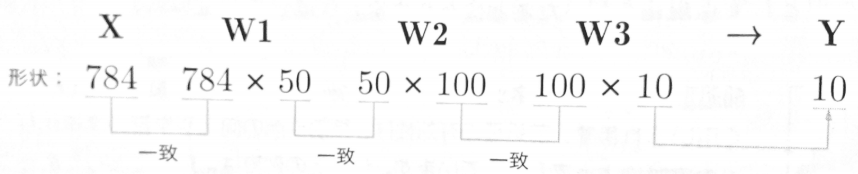

　上記は、全体を通してみれば、784の要素からなる1次元配列(元は28x28の2次元配列)が入力され、1次元の配列(要素数10)が出力されるという流れになっています。これは画像データを1枚だけ入力したときの処理の流れです。  
　画像を複数枚まとめて入力する場合を考えましょう。例えば、100枚の画像をまとめて、1回のpredict()関数で処理したいと思います。そのためには、xの形状を100x784として、100枚のデータをまとめて入力データとすることが出来ます。以下のようになります。

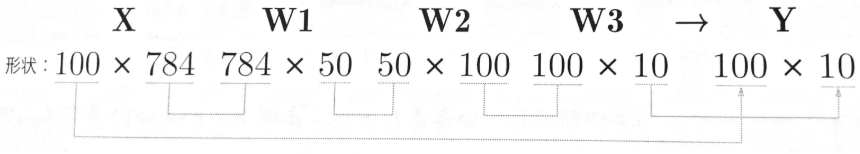

　入力データの形状は100x784、出力データの形状は100x10になります。これは、100枚分の入力データの結果が一度に出力されることを表しています。例えば、x[0]とy[0]には0番目の画像とその推論の結果、x[1]とy[1]には1番目の画像とその結果、・・・というように格納されています。  
　なお、ここで説明したような、まとまりのある入力データを**バッチ**(batch)と呼びます。バッチには「束」という意味があり、画像がお札のように束になっているイメージです。
>>
* バッチ処理の利点
  * 1枚当たりの処理時間を大幅に短縮できる
    * 数値計算を扱うライブラリの多くは、大きな配列の計算を効率よく処理できるような高度な最適化が行われているため
  * データ転送がボトルネックになる場合に、バス帯域の付加を軽減することが出来る
    * メモリ上に展開されているデータ→CPUに受け渡して数値計算を行う。この受け渡しの回数を減らすということ
* つまり、バッチ処理を行うことで大きな配列の計算を行うことになるが、大きな配列を一度に計算する方が、分割した小さい配列を少しずつ計算するよりも早く計算が完了する。

In [0]:
# バッチ処理を実装したコード

x, t = get_data()
network = init_network()

batch_size = 100  # バッチの数
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]          # [0:100], [100:200], ..., [9900:10000]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

* range(start, end)によって、end-1までの整数からなるリストを作成する

* range(start, end, step)のように指定すると、リストの要素の次の値がstepで指定された値だけ増加するリストを作成する

* argmax()で最大値のインデックスを取得する
  * axis=1で行の最大値インデックス, axis=0で列の最大値インデックス

In [0]:
print(list( range(0, 10) ))
print(list( range(0, 10, 3) ))

x = np.array([[0.1, 0.8, 0.1],
              [0.3, 0.1, 0.6],
              [0.2, 0.5, 0.3],
              [0.8, 0.1, 0.1]])

y = np.argmax(x, axis=1)
print(y)

　最後に、バッチ単位で分類した結果と、実際の答えを比較します。そのために、Numpy配列どうして、比較演算子(==)によって、True/Falseからなるboolean配列を作成し、Trueの個数を算出します。これらの処理手順は次の例で確認します。

In [0]:
y = np.array([1, 2, 1, 0])
t = np.array([1, 2, 0, 0])
print(y==t)

np.sum(y==t)

　以上で、バッチ処理による実装の解説は終わりです。バッチ処理を行うことで、高速に効率よく処理することができました。また、次章でNNの学習を行う際にも、画像データをまとまりのあるバッチとして学習します。その際にも、バッチ処理と同様な実装を行うことになります。

## **3.7 まとめ**
　本章では、NNの順方向の伝播(予測・推論に相当)について解説しました。本章で説明したNNは、前章のパーセプトロンと、ニューロンの信号が階層的に伝わるという点で同じでした。しかし、次のニューロンへ信号を送信する際に、信号を変化させる活性化関数に大きな違いがありました。NNでは活性化関数が滑らかに変化するシグモイド関数、パーセプトロンでは信号が急に変化するステップ関数を使用しました。この違いがNNの学習において重要になってきますが、これは次章で説明します。

## **補足**

### **カラー画像と白黒画像**


In [0]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open('lib/dataset/lena.png')
# 画像をnumpy配列に変換
img = np.asarray(img)

print("形状:", img.shape)
plt.imshow(img)
img # 上からRGB

In [0]:
img_gray = Image.open('lib/dataset/lena_gray.png')
img_gray = np.asarray(img_gray)

print("形状:", img_gray.shape)
plt.imshow(img_gray)
img_gray